In [54]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import math
import operator
from sklearn.decomposition import PCA

In [55]:
header1 = ['Time in seconds', 'frontal axis', 'vertical axis', 'lateral axis', 'Id sensor', 'RSSI', 'Phase', 'Frequency', 'activity']
df = pd.read_csv('data.csv', sep=',', header=None)
df.columns = header1
df.head()

,Time in seconds,frontal axis,vertical axis,lateral axis,Id sensor,RSSI,Phase,Frequency,activity
0,0.00,0.57689,0.88191,-0.082102,2,-62.0,0.62740,922.75,4
1,2.00,0.45964,0.81301,-0.150520,2,-60.0,0.87284,925.75,4
2,3.25,0.45964,0.81301,-0.150520,2,-67.5,0.37429,925.25,4
3,4.00,0.57689,0.82449,-0.127710,3,-63.0,5.85670,921.75,1
4,5.00,0.42446,0.88191,-0.104910,2,-59.5,5.20020,923.75,1


In [56]:
df['activity'].unique()

array([4, 1, 3, 2])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time in seconds  2529 non-null   float64
 1   frontal axis     2529 non-null   float64
 2   vertical axis    2529 non-null   float64
 3   lateral axis     2529 non-null   float64
 4   Id sensor        2529 non-null   int64  
 5   RSSI             2529 non-null   float64
 6   Phase            2529 non-null   float64
 7   Frequency        2529 non-null   float64
 8   activity         2529 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 177.9 KB


In [58]:
df.isnull().sum().sort_values().tail(15)
#Обнаружение пропущенных значений

Time in seconds    0
frontal axis       0
vertical axis      0
lateral axis       0
Id sensor          0
RSSI               0
Phase              0
Frequency          0
activity           0
dtype: int64

In [59]:
df.duplicated().sum() #Поиск дубликатов

0

In [60]:
df.describe()

,Time in seconds,frontal axis,vertical axis,lateral axis,Id sensor,RSSI,Phase,Frequency,activity
count,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000
mean,384.029021,0.355707,0.377902,-0.946508,2.398181,-55.476671,2.606193,922.210261,2.988533
std,275.715260,0.118218,0.119013,0.104630,0.497633,7.323156,1.729858,1.507268,0.191459
min,0.000000,-0.173540,0.078086,-1.154000,1.000000,-71.000000,0.001534,920.250000,1.000000
25%,97.500000,0.283760,0.296270,-1.005700,2.000000,-62.500000,1.449600,920.750000,3.000000
50%,521.000000,0.330660,0.342200,-0.948730,2.000000,-51.500000,2.245700,921.750000,3.000000
75%,641.330000,0.424460,0.480000,-0.914520,3.000000,-49.000000,3.117000,923.250000,3.000000
max,755.250000,0.752770,1.008200,0.157360,3.000000,-44.000000,6.281700,925.750000,4.000000


In [61]:
df.shape[0]

2529

In [62]:
len(df.columns)

9

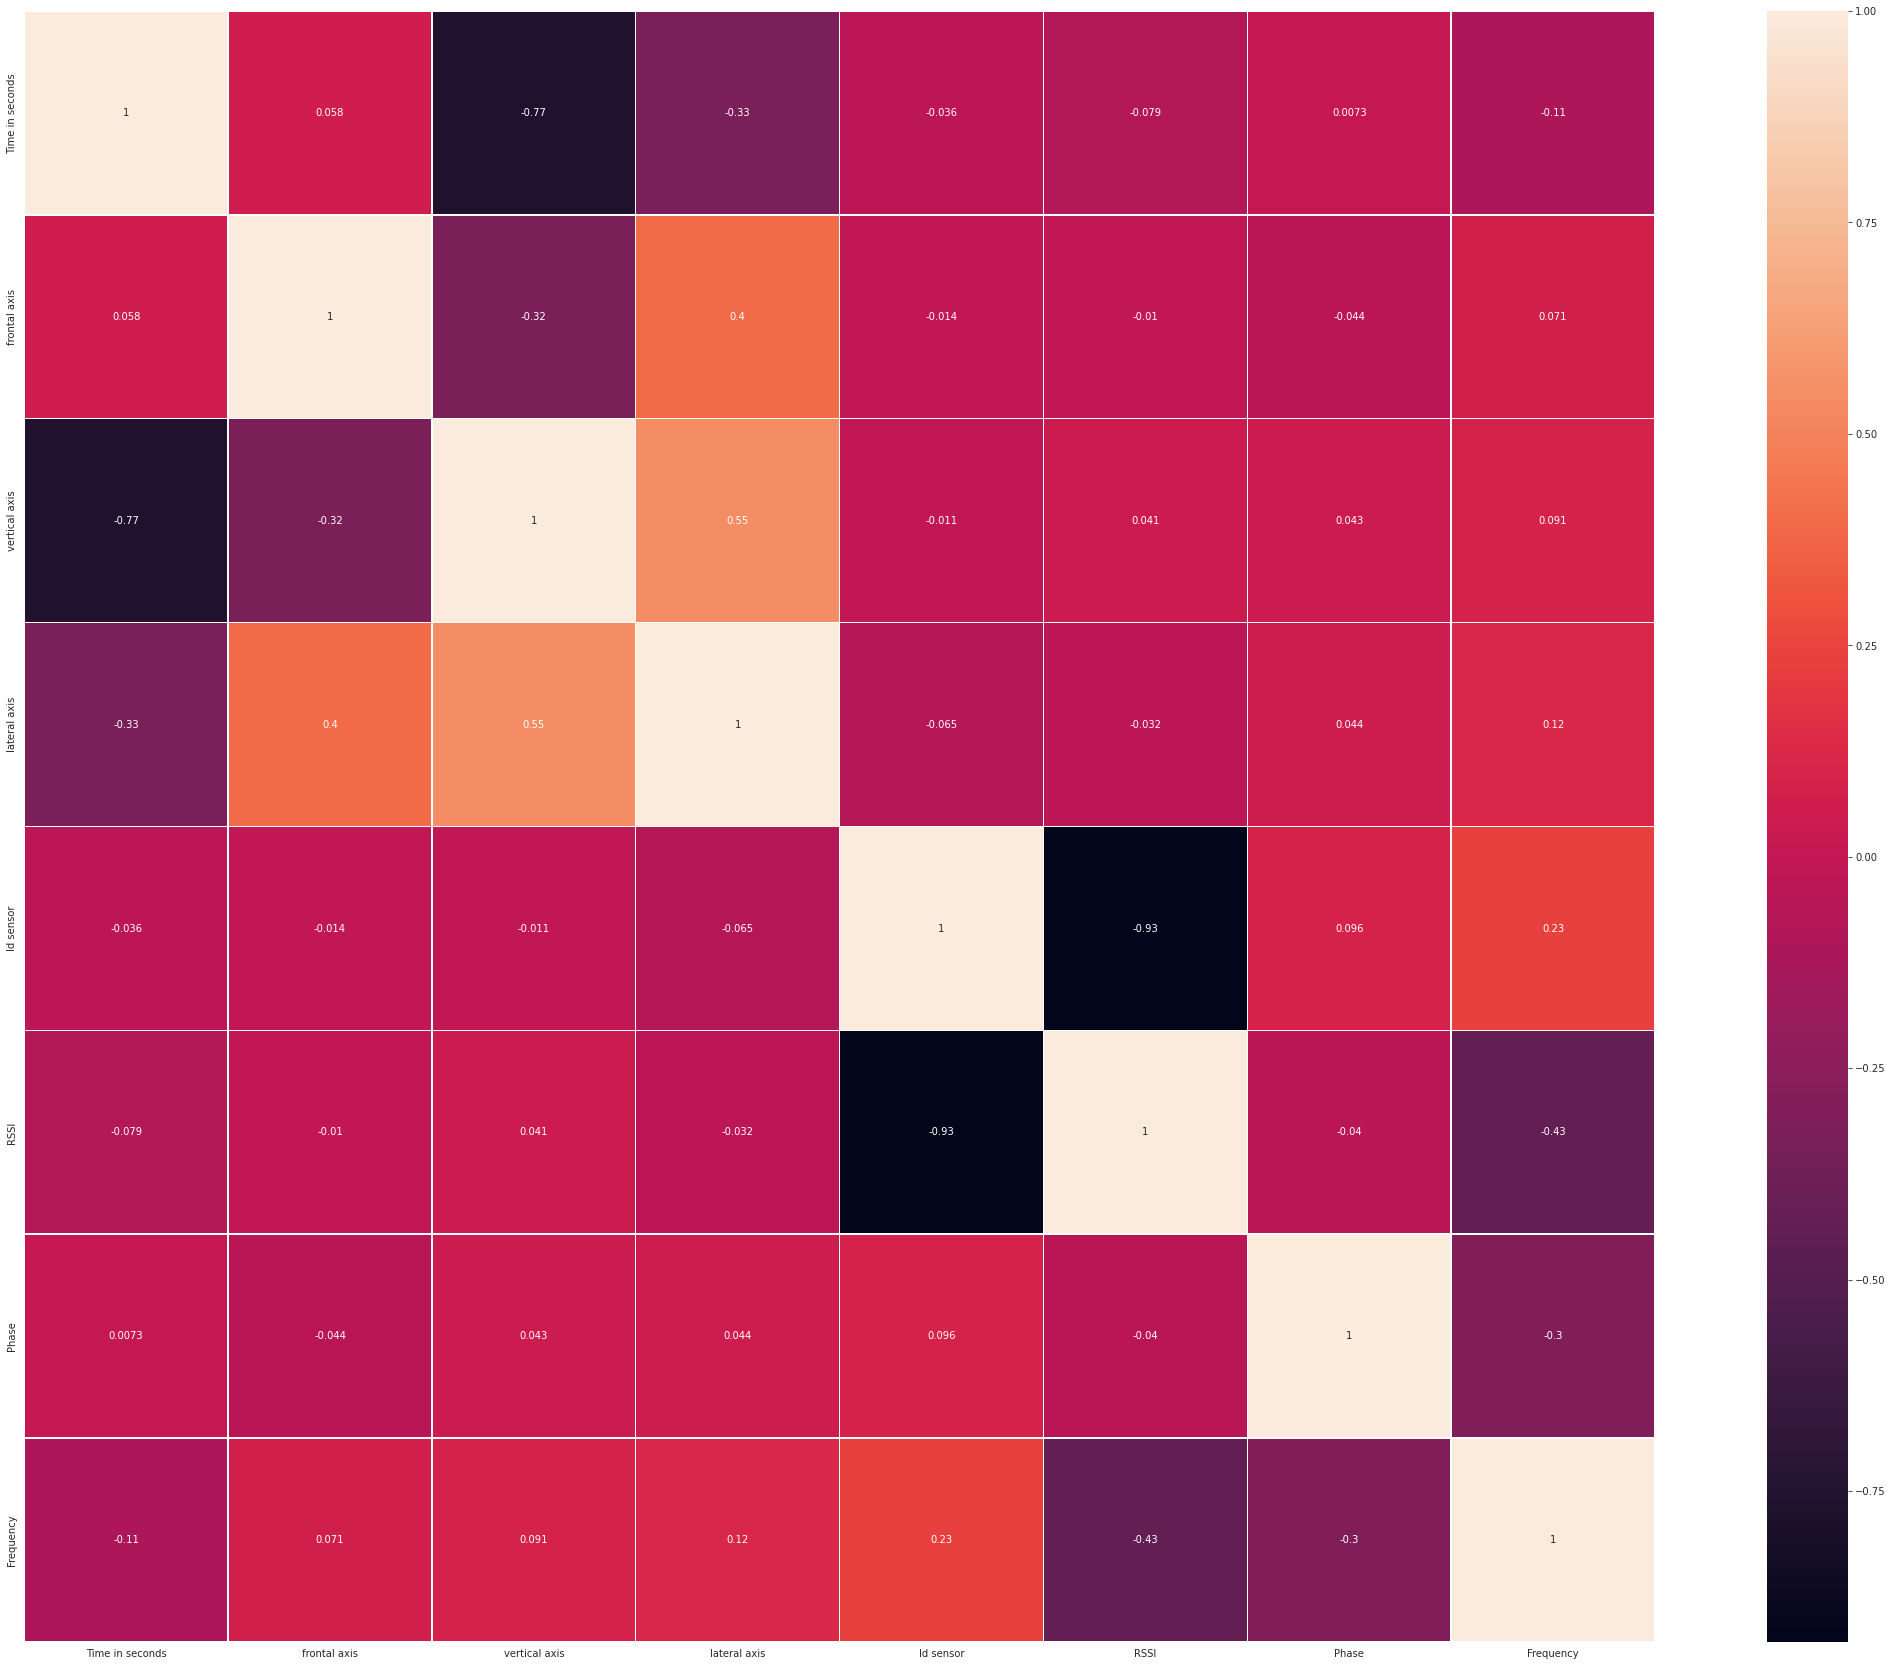

In [63]:
corr = df.loc[:, df.columns != 'activity'].corr()
with sns.axes_style("white"):
    ax = plt.subplots(figsize=(40, 30))
    ax = sns.heatmap(corr, square=True,annot = True, linewidths=.5)

In [64]:
# Метод опорных компонент

# Стандартизация данных

parametr = df.columns.tolist()

normalized_df = pd.DataFrame()

for column in range(len(parametr)-1):
    normalized_df[parametr[column]]=( df[parametr[column]]-df[parametr[column]].mean() ) / (df[parametr[column]].std(ddof=0))   

normalized_df['activity'] = df['activity']

normalized_df

,Time in seconds,frontal axis,vertical axis,lateral axis,Id sensor,RSSI,Phase,Frequency,activity
0,-1.393122,1.871341,4.235725,8.263191,-0.800308,-0.890957,-1.144131,0.358162,4
1,-1.385867,0.879334,3.656684,7.609156,-0.800308,-0.617797,-1.002218,2.348911,4
2,-1.381332,0.879334,3.656684,7.609156,-0.800308,-1.642148,-1.290478,2.017119,4
3,-1.378611,1.871341,3.753163,7.827206,1.209601,-1.027538,1.879431,-0.305421,1
4,-1.374984,0.581689,4.235725,8.045160,-0.800308,-0.549507,1.499845,1.021745,1
...,...,...,...,...,...,...,...,...,...
2524,1.341217,-1.104765,5.104287,9.353248,-2.810216,0.884585,1.848382,-0.305421,4
2525,1.341508,-1.104765,5.104287,9.353248,-2.810216,0.884585,1.796981,-0.305421,4
2526,1.341689,-1.104765,5.104287,9.353248,-2.810216,0.884585,1.617797,-0.305421,4
2527,1.342124,-0.112758,4.718203,10.552301,-2.810216,0.543134,1.990329,1.353536,4


In [65]:
test_df = normalized_df[:9000]

features, target = test_df.drop(columns=['activity']).to_numpy(), np.array(test_df['activity'])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, test_df['activity']], axis = 1)

def plot_clusters(df, text):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(f'2 component PCA {text}', fontsize = 20)
    targets = [1, 2, 3, 4]
    colors = ['r', 'g', 'b', 'y']
    for target, color in zip(targets,colors):
        indicesToKeep = df['activity'] == target
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

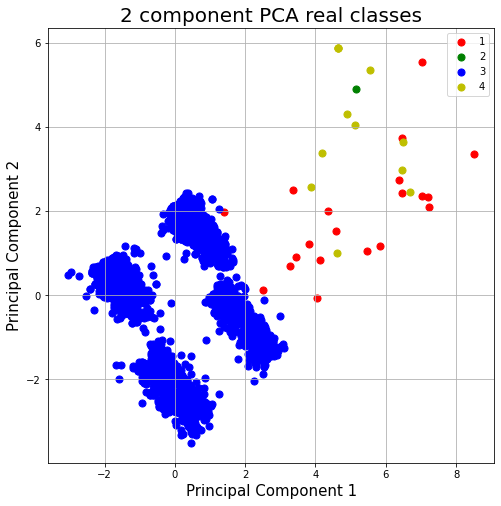

In [66]:
plot_clusters(finalDf, 'real classes')

In [67]:
def euclide_metrics(X_i, X_k):
    distance = 0
    for x in range (len(X_i)):
        distance += pow((X_i[x] - X_k[x]), 2)
    return math.sqrt(distance)

def initialize_centroids(data, k):
    centroids = []
    centroids.append(data[np.random.randint(
    data.shape[0]), :])
    
    distances = []
    L = 0
    for i in range(len(data)):
        dist = euclide_metrics(data[i], centroids[0])
        distances.append(dist)
        L += pow(dist, 2)
    
    u_n = np.random.uniform(0, 1, k-1)
    for c_i in range(k-1):
        j = 0
        u = u_n[c_i]
        Sum = 0 
        while Sum < u:
            Sum += (pow(distances[j],2) / L)
            j += 1
        centroids.append(data[j])
    
    return centroids
def k_means(data, start_centroids, eps = 0.01):
    centroids = start_centroids.copy()
    iterations = 0
    
    while (iterations <= 100):
        clusters = []
        for i in range(len(centroids)):
            clusters.append([centroids[i]])
        
        for i in range(len(data)):
            distances_to_cluster = []
            for j in range(len(centroids)):
                dist = euclide_metrics(data[i], centroids[j])
                distances_to_cluster.append(dist)

            num_cluster = distances_to_cluster.index(min(distances_to_cluster))
            clusters[num_cluster].append(data[i])

        new_centroids = []
        for object_i in range(len(clusters)):
            n = len(clusters[object_i])
            new_centroids.append(np.sum(clusters[object_i], axis = 0) / n)
        
        distance_new_old_centroid = []
        for i in range(len(centroids)):
            dist = euclide_metrics(new_centroids[i], centroids[i])
            distance_new_old_centroid.append(dist)
        
        if max(distance_new_old_centroid) < eps:
            return new_centroids, clusters, iterations
        else:
            iterations += 1
            centroids = new_centroids.copy()
        
        
    return new_centroids, clusters, iterations

In [68]:
centroids = initialize_centroids(features, 4)

new_centroids, clusters, iters = k_means(features, centroids)

def return_df(clusters, centroids):
    array = clusters.copy()
    array_centroids = centroids.copy()
    header = ['Time in seconds', 'frontal axis', 'vertical axis', 'lateral axis', 'Id sensor', 'RSSI', 'Phase', 'Frequency']
    df = pd.DataFrame(columns = header)
    df_centroids = pd.DataFrame(columns = header)
    for i in range(4):
        array_centroids[i] = np.append(array_centroids[i], i+1)
        array[i].pop(0)
        df_clusters = pd.DataFrame(data = array[i], columns = header)
        df_clusters.insert(8, "activity", i+1)
        df = pd.concat([df, df_clusters], ignore_index=True)
    
    df_centroids = pd.DataFrame(data = array_centroids, columns = header1)
    df = pd.concat([df, df_centroids], ignore_index=True)
    df['activity'] = df['activity'].astype('int')
    
    features_kmeans, target_kmeans = df.drop(columns=['activity']).to_numpy(), np.array(df['activity'])
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(features_kmeans)
    
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, df['activity']], axis = 1)
    
    return finalDf

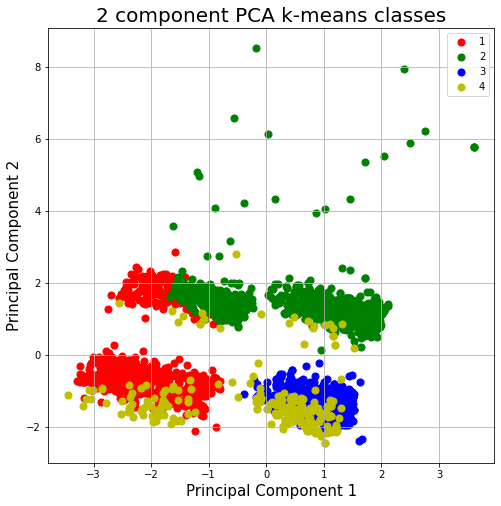

In [74]:
principal_df = return_df(clusters, new_centroids)
plot_clusters(return_df(clusters, new_centroids), 'k-means classes')

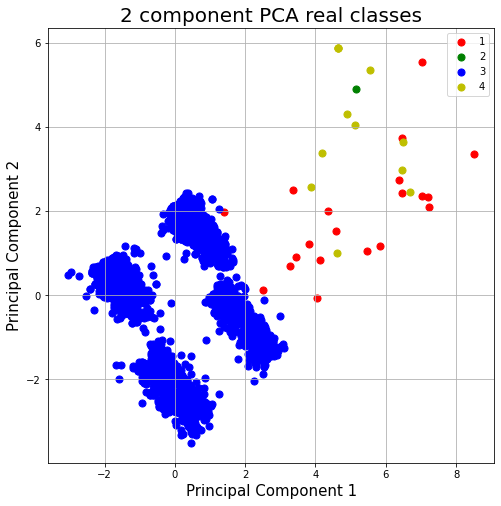

In [75]:
plot_clusters(finalDf, 'real classes')

In [76]:
def split_train_test(X, y, test_ratio):
  np.random.seed(42)
  shuffled_indices = np.random.permutation(len(X))
  test_set_size = int(len(X)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return X[train_indices], X[test_indices], y[train_indices], y[test_indices] # вернет строки, указанные в idices

In [77]:
test_df = normalized_df[:6000]
features_full, target_full = normalized_df.drop(columns=['activity']).to_numpy(), np.array(normalized_df['activity'])
X_train_f, X_test_f, y_train_f, y_test_f = split_train_test(features_full, target_full, .2)
print(len(X_train_f), 'train +',len(X_test_f),'test')

2024 train + 505 test


In [78]:
X_train, X_test, y_train, y_test = split_train_test(features, target, .2)
print(len(X_train), 'train +',len(X_test),'test')

2024 train + 505 test


In [98]:
class KNN:
    def __init__(self, features, target):
        self.features = features
        self.target = target
        self.classes = np.unique(target)
        
    def euclide_metrics(self, i, object_2, length):
        distance = 0
        object_1 = self.features[i]
        for x in range (length):
            distance += pow((object_1[x] - object_2[x]), 2)
        return math.sqrt(distance)
    
    def indicator(neighbors, klass):
        indicators = []
        for i in range(len(neighbors)):
            if neighbors[i] == klass:
                indicators.append(1)
            else:
                indicators.append(0)
        return indicators
        
    def weight(neighbors,q):
        weights = []
        for i in range(len(neighbors)):
            weights.append(q**i)
        return weights
        
    
    def chooseNeighbors(self, test_features, k):
        distances = []
        length = len(test_features)
        for x in range(len(self.features)):
            dist = self.euclide_metrics(x, test_features, length)
            distances.append((self.target[x], dist))
        distances.sort(key=operator.itemgetter(1))
        #neighbors = [element[0] for element in distances]
        neighbors = []
        #return neighbors
        for x in range(k):
            neighbors.append(distances[x][0])
        return neighbors
    
    def getResponse(self, neighbors):
        classVotes = {}
        class_indicator = []
        for response in self.classes:
            indicators = []
            for i in range(len(neighbors)):
                if neighbors[i] == response:
                    indicators.append(1)
                else:
                    indicators.append(0)
            #indicators = indicator(neighbors, response)
            class_indicator.append(indicators)
        
        weights = []
        q = 0.5
        for i in range(len(neighbors)):
            weights.append(q**i)
        
        for x in range(len(neighbors)):
            for response in self.classes:
                if response in classVotes:
                    classVotes[response] += class_indicator[response-1][x]*weights[x]
                else:
                    classVotes[response] = class_indicator[response-1][x]*weights[x]
        sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
        return sortedVotes[0][0]
    
    def getAccuracy(self, target, predictions):
        correct = 0
        for x in range(len(target)):
            if target[x] == predictions[x]:
                correct += 1
        return round(correct / float(len(target)), 4) * 100.0
    
    def score(self, test_features, test_target, k):
        predictions = []
        for x in range(len(test_features)):
            neighbors = self.chooseNeighbors(test_features[x], k)
            result = self.getResponse(neighbors)
            predictions.append(result)
        accuracy = self.getAccuracy(test_target, predictions)
        return accuracy, predictions

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_f, y_train_f)
print('Результат sklearn реализации KNN на обучающей выборке: {:.2%}'.format(knn.score(X_train_f, y_train_f)))
print('Результат sklearn реализации KNN на тестовой выборке: {:.2%}'.format(knn.score(X_test_f, y_test_f)))

Результат sklearn реализации KNN на обучающей выборке: 99.51%
Результат sklearn реализации KNN на тестовой выборке: 99.41%


In [100]:
class NaiveBayes:
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.label_probabilities = {}
        for response in self.classes:
            self.label_probabilities[response] = len(y[y == response]) / len(y)
        self.conditional_probabilities = {}
        for value in self.classes:
            probabilities = []
            for column in range(X.shape[1]):
                x = X[y == value, column]
                probabilities.append([x.mean(), x.std()])
            self.conditional_probabilities[value] = probabilities
            
    
    def predict(self, X):
        label_probabilities = {}
        for value in self.classes:
            conditional_feature_probability = self.label_probabilities[value]
            for i in range(X.shape[0]):
                m = self.conditional_probabilities[value][i][0]
                sigma = self.conditional_probabilities[value][i][1]
                conditional_feature_probability *= np.exp(-(X[i] - m)**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)
            label_probabilities[value] = conditional_feature_probability
        return max(label_probabilities, key=label_probabilities.get)


    def score(self, X, y):
        rigth_predict_number = 0
        predictions = []
        for i in range(X.shape[0]):
            prediction = self.predict(X[i])
            predictions.append(prediction)
            if prediction == y[i]:
                rigth_predict_number += 1

        return round(rigth_predict_number / y.shape[0], 4) * 100

In [102]:
nb = NaiveBayes()
nb.fit(X_train, y_train)

In [103]:
nb_f = NaiveBayes()
nb_f.fit(X_train_f, y_train_f)
print('Результат собственной реализации наивного байесовского классификатора на обучающей выборке: ', 
      nb_f.score(X_train_f, y_train_f),'%')
print('Результат собственной реализации наивного байесовского классификатора на обучающей выборке: ', 
      nb.score(X_test_f, y_test_f),'%')

Результат собственной реализации наивного байесовского классификатора на обучающей выборке:  99.75 %
Результат собственной реализации наивного байесовского классификатора на обучающей выборке:  99.6 %


In [104]:
print('Результат собственной реализации наивного байесовского классификатора на обучающей выборке: ', 
      nb.score(X_train, y_train),'%')

Результат собственной реализации наивного байесовского классификатора на обучающей выборке:  99.75 %


In [105]:
print('Результат собственной реализации наивного байесовского классификатора на обучающей выборке: ', 
      nb.score(X_test, y_test),'%')

Результат собственной реализации наивного байесовского классификатора на обучающей выборке:  99.6 %


In [106]:
from sklearn import naive_bayes
sklearn_nb = naive_bayes.GaussianNB()
sklearn_nb.fit(X_train_f, y_train_f)
print('Результат sklearn реализации наивного байесовского классификатора на обучающей выборке: {:.2%}'
      .format(sklearn_nb.score(X_train_f, y_train_f)))
print('Результат sklearn реализации наивного байесовского классификатора на тестовой выборке: {:.2%}'
      .format(sklearn_nb.score(X_test_f, y_test_f)))

Результат sklearn реализации наивного байесовского классификатора на обучающей выборке: 99.75%
Результат sklearn реализации наивного байесовского классификатора на тестовой выборке: 99.60%
